In [36]:
using Plots, Interact, DifferentialEquations, BifurcationKit, Setfield, ForwardDiff
using NonLinearDynamicsCourse

# Bifurcacion Saddle-Node en el plano

Volviendo al sistema:

$\dot{x} = a-y$

$\dot{y} = x^2-y$

Donde se puede ver que lo que sucede a medida que $a$ se aproxima a cero por los positivos es que los dos puntos fijos (un punto silla y un atractor) se van acercando y para $a=0$ colapsan y se produce una bifurcacion de nodo-silla en el plano. 

El cambio del flujo debido a la bifurcacion es analogo a lo que observabamos en 1D, ya que la bifurcacion se produce a lo largo de una curva y en la direccion perpendicular a la curva el flujo es atractor. Esto se ve mas claro si le agregamos un parametro que permita amplificar la disipacion b (obviamente positivo).

$\dot{x} = a-y$

$\dot{y} = x^2-by$

Cuando b es muy grande como se puede probar en las celdas que siguen el flujo converge muy rapidamente a la nulclina de $\dot{y}=0$ y una vez sobre esa curva se mueve mas lentamente hacia el nodo atractor. Es decir que en este caso la dimension adicional entra como una variable rapida (un transitorio), pero la dinamica interesante sucede a lo largo de la curva (parabola) y sobre esa curva se produce la bifurcacion (explorarlo en el grafico interactivo debajo).



In [2]:
function nodosilla2d!(du,u,p,t)
    du[1] = p[1]-u[2]
    du[2] = u[1]*u[1]-p[2]*u[2]
    du
end    

nodosilla2d! (generic function with 1 method)

In [3]:
@manipulate throttle=0.5 for xini=-1:0.1:1, yini=-1:0.1:1,a=-1.0:0.01:1.0,b=0.1:0.1:3.0
    solve_plot_nullclines(nodosilla2d!,[xini;yini],50.0,[a,b])
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008367f6c0, Task (runnable) @0x000000008367f6c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"na

En este caso puede ser mas instructivo ver como se modifican las variedades estables del punto silla con el parametro $b$. Recordar que estas curvas (en azul) actuan como separatrices del flujo, Todo lo que este del lado de estas curvas donde esta el atractor converje a el y todo lo que esta del otro se escapa. Si $b$ es chico las variedades se acercan al atractor y la region estable es muy chica. A medida que $b$ crece la variedad inestable (curva roja) sigue la parabola y la estable se transforma en una recta perpendicular a la parabola en ese punto, y todo lo que esta a la derecha queda en la cuenca de atraccion del punto fijo de la derecha 

In [4]:
function nodosilla2d_jac(u,p)
  J = Array{Float64, 2}(undef, 2, 2)
  J[1,1] = 0
  J[1,2] = -1.0
  J[2,1] = 2*u[1]
  J[2,2] = -p[2]
  return J
end

nodosilla2d_jac (generic function with 1 method)

In [5]:
@manipulate for a=0.0:0.01:0.2,b=0.1:0.1:3.0
    u0_array=[[-sqrt(a*b);a],[sqrt(a*b);a]]
    plot_manifolds(nodosilla2d!,nodosilla2d_jac,u0_array,[a,b];tmax=300,delta=1e-7,xlims=[-2,2],ylims=[-2,2])
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007a52a590, Task (runnable) @0x000000007a52a590), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\"],\"changes\":WebIO.getval(

## Estabilidad de los puntos fijos y autovalores

Los puntos fijos para $a>0$ estan en ($x=\pm\sqrt{ab}$,$y=a$) y la matriz jacobiana evaluada en ese punto es:

$
\begin{pmatrix}
0 & -1\\
\pm2\sqrt{ab} & -b
\end{pmatrix}
$

Que la traza sea siempre negativa ($-b$) implica que ninguno de ellos es un repulsor, solo puede ser un puinto silla o un atractor. Esto es logico porque hay una direccion en la que los dos son atractores y es la direccion en la que converge rapidamente a la parabola. Mientras que el determinante es positivo para el punto a la derecha (atractor) y negativo para el de la izquierda (punto silla). A medida que nos acercamos a la bifurcacion ambos puntos tienen la misma traza y el determinante se va aproximado a cero por los negativos y los positivos y colisionan en el eje $\Delta=0$. 

Otra forma mas interesante de verlo es recordar que los autovalores de la matriz se podian escribir como 

$\lambda_1 = \frac{\tau+\sqrt{\tau^2-4\Delta}}{2} \quad \quad \lambda_2 = \frac{\tau-\sqrt{\tau^2-4\Delta}}{2}$ 

Para el atractor estos autovalores serian:

$\lambda_1 = \frac{-b+\sqrt{b^2-8\sqrt{ab}}}{2} \quad \quad \lambda_2 = \frac{-b-\sqrt{b^2-8\sqrt{ab}}}{2}$ 

Ambos autovalores son negativos (y reales porque recordemos que $b$ es un valor grande y estamos estudiando el imite de la bifurcacion de $a$ acercandose a cero desde los positivos) porque le estamos sumando y restando a $-b$ un numero que es mas chico en valor absoulto (la raiz es mas chica).

y para el punto silla:

$\lambda_1 = \frac{-b+\sqrt{b^2+8\sqrt{ab}}}{2} \quad \quad \lambda_2 = \frac{-b-\sqrt{b^2+8\sqrt{ab}}}{2}$ 

Ahora la raiz es mas grande que $b$ en valor absoluto asi que el primer autovalor es positivo y tiene asociado un autovector que apunta en la direccion repulsora del punto silla (se puede calcular que para $b$ grande es tangente a la parabola).

Lo interesante es que a medida que nos aproximamos a la bifurcacion el segundo autovalor tiende en ambos casos a $-2b$, pero el primero tiende a cero (por los negativos y por los positivos) y en la bifurcacion es estrictamente cero. Esta condicion es necesaria en general para que ocurra la bifurcacion de nodo silla en cualquier numero de dimensiones. Podemos tener varias direcciones con autovalores diferentes de cero, pero si en una de las direcciones uno de los autovalores se hace cero (o mas estrictamente cruza el cero por el eje real para distinguirla de otras) entonces tenemos una bifurcacion de nodo silla. De un lado de la bifurcacion tendremos dos puntos fijos (con autovalores positivos y negativos en esa direccion) y del otro lado esos dos puntos fijos no existen mas. Hay algunas condiciones que se tienen que cumplir para distinguirla de la transcritica y la pitchfork (y de otras que se vana a ver mas adelante), pero por ahora nos vamos a quedar con esa condicion

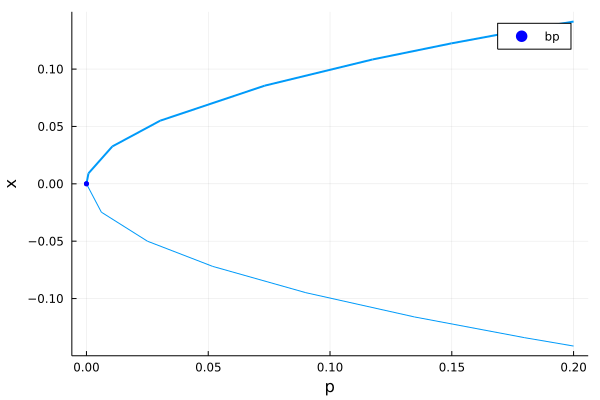

In [8]:
nodosilla2d(u,p) = nodosilla2d!(similar(u),u,p,0)
opts = ContinuationPar(pMin=-0.1,pMax=0.2, ds = -0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
br1, = continuation(nodosilla2d,[0.1,0.1],[0.2,0.1],(@lens _[1]), opts;recordFromSolution = (x, p) -> x[1])
plot(br1)

# Bifurcacion Pitchfork en el plano

Volviendo al oscilador de Duffing:

$\dot{x} = y$

$\dot{y} = -\gamma y + \beta x -  x^3 $

Con puntos fijos en:

Para $\beta<0$:
    
$x^*_1=0$ atractor

Para $\beta>0$:

$x^*_1=0$ punto silla

$x^*_{2,3} = \pm \sqrt{\beta}$ atractores

El punto fijo en cero cambia de estabilidad y al mismo tiempo aparecen otros dos puntos fijos, eso es una bifurcacion de Pitchork. Pero notar que el cambio de estabilidad es de un nodo atractor a un punto silla (no un repulsor). Eso es porque hay una direccion (transverrsal a la parabola) que es siempre atractora, y ese punto fijo luego de la bifurcacion pasa a tener una direccion inestable (punto silla) y esa direccion inestable es en la direccion tangente a la parabola. Verificar eso en el grafico interactivo.

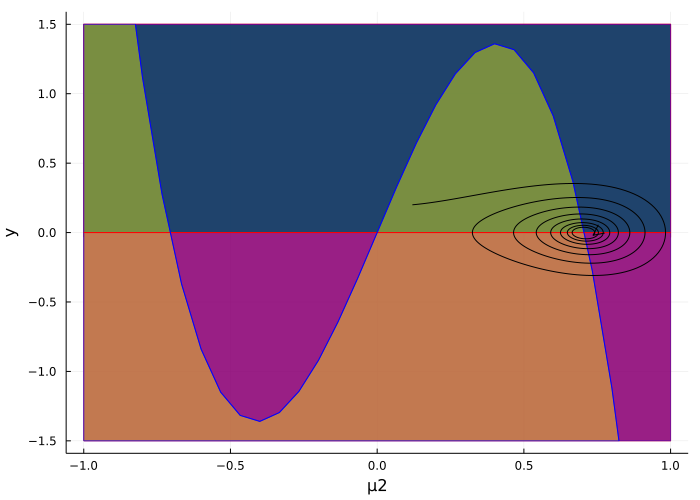

In [9]:
#la Ed para el oscilador de Duffing definida in-place
function duffing!(du,u,p,t)
    du[1] = u[2]
    du[2] = -p[1]*u[2]+u[1]*(p[2]-u[1]*u[1])
    du
end    

solve_plot_nullclines(duffing!,[0.12;0.2],50.0,[0.1,0.5];ylims=[-1.5,1.5])

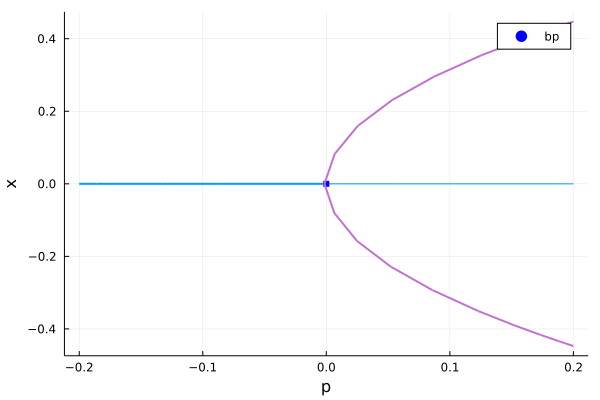

In [10]:
duffing(u,p) = duffing!(similar(u),u,p,0)
opts = ContinuationPar(pMin=-0.2,pMax=0.2, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
br1, = continuation(duffing,[0.1,0.1],[0.1,-0.2],(@lens _[2]), opts)
opts = ContinuationPar(pMin=-0.2,pMax=0.2, ds=-0.01, dsmax=0.04, detectBifurcation=3)
br2, = continuation(duffing,[-0.5,0.1],[0.1,0.2],(@lens _[2]), opts;recordFromSolution = (x, p) -> x[1])
plot(br1)
plot!(br2)

# Bifurcacion de Hopf

En Flujos 2D existe otra bifurcacion que no existe en 1D. Cuando un punto fijo pierde estabilidad, pasa de ser atractor a repulsor lo hace a traves de un centro (foco atractor que se transforma en repulsor). Esto sucede cuando el Determinante del Jacobiano es positivo y la Traza cambia de signo pasando por cero. Recordar que en este caso los autovalores eran complejos (foco) y la parte real era la traza asi que otra forma de caracterizar esta bifurcacion es cuando para un punto fijo **ambos** autovalores cruzan el eje imaginario (parte real cero). 

En un sistema lineal eso significa unicamente un cambio de direccion en el flujo del foco (espiral atractor a repulsor). Pero en los sistemas no lineales los terminos de orden mas alto dan de forma generica origen a un ciclo limite que es expelido del foco y se produce una Bifurcacion de Hopf con el cambio de estabilidad. Hay dos tipos de B de Hopf, supercritica y subcritica. Por ahora nos va a interesar mas la supercritica y para este tipo la historia es asi: de un lado de la bifurcacion (en la figura para $\beta<0$) tengo un foco atractor, el Jacobiano tiene traza negativa. En la bifurcacion el foco se transforma en un centro ($\beta=0$) y las trayectorias se siguen aproximando (por los terminos no lineales) pero no convergen nunca al centro. Y luego de la bifurcacion el punto fijo pierde estabilidad y se transforma en repulsor. Pero ahora bien como es una bifurcacion LOCAL, el flujo lejos "no se entero" del cambio de estabilidad y sigue siendo atractor (dominan) los terminos no lineales. Por lo tanto el flujo sigue siendo globalmente atractor y se acerca a al regio del centro, pero como al mismo tiempo es expelido de el, en alguna parte se tiene que acumular y se forma un ciclo limite estable. O sea, del otro lado de la bifurcacion (para $\beta>0$) tengo un foco repulsor que alimenta a un ciclo limite atractor.

<div>
<img src="../files/hopf.png" width="500px">
</div>

La forma normal de la bifurcacion de Hopf (supercritica) es la siguiente


$\dot{x} = \beta x - y - x(x^2+y^2) $

$\dot{y} = x + \beta y - y(x^2+y^2) $

Parece complicado pero veamos primero que el punto fijo esta en $(0,0)$ y si queremos calcular el Jacobiano va a tener un monton de terminos pero solo van a sobrevivir los que no tengan ni $x$ ni $y$ porque esos van a ser cero. Asi que el Jacobiano evaluado en el punto fijo $(0,0)$ es solo el de la parte lineal y es:

$
\begin{pmatrix}
\beta & -1\\
1 & \beta 
\end{pmatrix}
$

La traza es $2\beta$ y el determinante siempre positivo $\beta^2+1$. Por lo tanto cuando $\beta$ cruza el cero cambia el signo de la Traza y el foco pasa de ser atractor a repulsor como muestra la figura.

Por otro lado los terminos no lineales tienen una expresion que equivale al radio al cuadrado $(x^2+y^2)$ con la variable cambiada de signo por lo tanto siempre van a ser atractores lejos. 

In [11]:
function hopf!(du,u,p,t)
    du[1] = p[1]*u[1] - u[2] - u[1]*(u[1]*u[1]+u[2]*u[2])
    du[2] = u[1] + p[1]*u[2] - u[2]*(u[1]*u[1]+u[2]*u[2])
    du
end

hopf! (generic function with 1 method)

In [14]:
@manipulate throttle=.05 for u1=-1:0.1:1,u2=-1:0.1:1,tmax=10:10:50,β=-0.5:.1:0.5
    prob = ODEProblem(hopf!, [u1; u2], (0, tmax), β)
    sol = solve(prob);
    p1 = plot(sol)
    p2 = plot(sol,vars=(1,2))
    scatter!(p2,[prob.u0[1]],[prob.u0[2]])
    plot(p1,p2,layout=(1,2),size = (900,450))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["u1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000120bdf50, Task (runnable) @0x00000000120bdf50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name

In [15]:
# multiples trayectorias
u0_arr = vec([[0.2*i-1,0.2*j-1] for i=0:10, j=0:10])
prob = ODEProblem(hopf!,u0_arr[1],(0,0.5),0.5)
ensamble_prob = EnsembleProblem(prob,prob_func=(prob,i,repeat;u0=u0_arr)->(remake(prob,u0=u0[i])))
sol = solve(ensamble_prob,EnsembleThreads(),trajectories=length(u0_arr))
plot(sol,vars=(1,2),arrow=true,size=(600,600))

In [16]:
@manipulate throttle=0.5 for xini=-1:0.1:1, yini=-1:0.1:1,β=-1.0:0.1:1.0
    solve_plot_nullclines(hopf!,[xini;yini],50.0,[β])
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000001169cfb0, Task (runnable) @0x000000001169cfb0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4\",\"-0.3\",\"-0.2\",\"-0.1\",\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"na

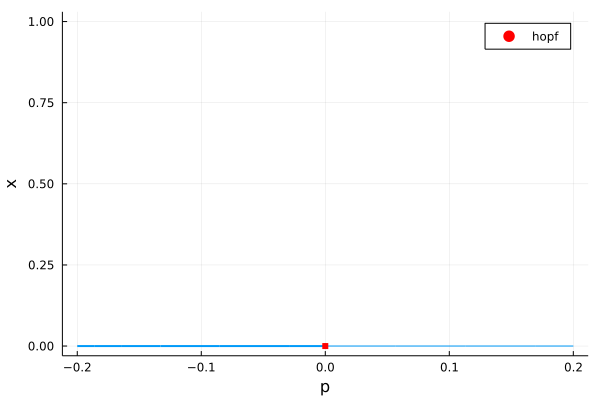

In [17]:
hopf(u,p) = hopf!(similar(u),u,p,0)
opts = ContinuationPar(pMin=-0.2,pMax=0.2, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
br1, = continuation(hopf,[0.1,0.1],[-0.2],(@lens _[1]), opts)
plot(br1)

## Bifurcacion de Hopf en el modelo de Predador-Presa

Recordamos que este modelo tenia como solucion un ciclo limite o un foco atractor dependiendo de los valores de parametros. Es de sospechar entonces que sea una bifurcacion de Hopf la que da nacimiento a ese ciclo limite estable. El modelo era

$\dot{x} = x(1-x)-\displaystyle \frac{axy}{x+c}$

$\dot{y} = by\displaystyle \left( 1-\frac{y}{x}\right)$

Hay que tener en cuenta que estas ecuaciones estan restringidas al dominio $x>0$,$y\geq0$ y que los parametros son tambien positivos (sino por ejemplo el segundo termino de la primera ecuacion explota cuando $x=-c$ o el segundo termino de la segunda cuando $x=0$)

volvemos a escribir la ecuacion haciendo uso explicito de los parametros $a,b,c$

In [18]:
function predatorprey!(du,u,p,t)
    (a,b,c) = p
    du[1] = u[1]*((1.0-u[1]) - a*u[2]/(c+u[1]))
    du[2] = b*u[2]*(1.0-u[2]/u[1])
    du
end    

predatorprey! (generic function with 1 method)

In [19]:
@manipulate throttle=0.2 for xini=0:0.1:1, yini=0:0.1:1,a=0.01:0.01:2,b=0.01:0.01:1,c=0.01:0.01:1
    solve_plot_nullclines(predatorprey!,[xini;yini],100.0,[a,b,c],xlims=[0.01,1.0],ylims=[0.01,1.0])
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["xini"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 11, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
6, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000860b5aa0, Task (runnable) @0x00000000860b5aa0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"12260531089092794413\",\"id\":\"13005158205405685446\",\"type\

Si bien las ecuaciones parecen mas complicadas las nulclinas no lo son tanto restringidas al dominio no negativo. Ademas de una nulclina en $y=0$ tenemos la recta $y=x$ para la segunda nulclina (linea diagonal azul) y una cuadratica que sale de la primera ecuacion que puede despejarse como:

$y=(x+c)(1-x)/a$

que es una parabola invertida que corta el eje horizontal en los puntos $x=1$ , $x=-c$ (fuera del dominio), y corta el eje vertical en $y=c/a$

En el dominio tenemos dos puntos fijos:

- donde se corta la parabola con el eje horizontal $x=1$, $y=0$ que es siempre un punto silla (esto se puede ver calculando el Jacobiano que en ese punto fijo tiene determinante igual a $-b$)
- donde se corta la parabola con la diagonal $x=y$ vamos a calcular la ubicacion de es punto fijo que es el que da lugar a la bifurcacion de Hopf


Haciendo $y=x$ en la ecuacion del a nulclina de la parabola y tomando solo la solucion positiva dentro del dominio tenemos:

$x_*  =   \frac{1-a-c}{2} + \sqrt{ \left( \frac{1-a-c}{2} \right)^2 + c}$

aun cuando $1-a-c$ es negativo la raiz es mayor en modulo por lo tanto siempre hay una raiz positiva.

Notar que tanto el punto fijo como las nulclinas no dependen del parametro $b$ sin embargo este si influencia en la estabilidad. 

## Estabilidad de los puntos fijo (opcional)

Calcular el jacobiano y evaluarlo los puntos fijos puede ser un poco arduo pero fijando $a=1$ y luego de algunas cuentas el Jacobiano queda expresado:

\begin{pmatrix}
1 -2x - \frac{cy}{(x+c)^2} & -\frac{x}{x+c}\\
b\frac{y^2}{x^2} & -b
\end{pmatrix}

el punto fijo es ahora 

$x_*  =  \displaystyle -\frac{c}{2} + \sqrt{\displaystyle \frac{c^2}{4}  + c}$

tras un poco de algebra la matriz Jacobiana queda:

\begin{pmatrix}
\frac{c^2}{2}  +\frac{5c}{2}+1-(c+3)\sqrt{\frac{c^2}{4}+c} & \sqrt{\frac{c^2}{4}+c}-\frac{c}{2}-1\\
b & -b
\end{pmatrix}


El determinante queda un poco mas simple:

$\Delta = b\left( (c+2)\sqrt{\frac{c^2}{4}+c}-\frac{c^2}{2}- 2c\right)$

que con un poco de trabajo (o graficando) se puede ver que es siempre negativo. 

Mientras que la traza puede ser positiva o negativa y se hace cero cuando (condicion de la bifurcacion de Hopf):

$b=\frac{c^2}{2}+\frac{5}{2}c+1-(c+3)\sqrt{\frac{c^2}{4}+c}$

En la seccion siguiente vamos a ver el significado de esa condicion expresada como $b$ en funcion de $c$ que determina una curva en el espacio de parametros $(b,c)$.

# Codimension de una bifurcacion

Si bien en el modelo anterior tuvimos que mover tres parametros para buscar la bifurcacion de Hopf (probar por ejemplo con $a=1$, $b=0.25$ y bajar el parametro $c$ cruzando el valor $0.1$), en realidad la bifurcacion de Hopf,  al igual que la de nodo-silla, se cruza moviendo un solo parametro. Mas adelante vamos a ver bifurcaciones donde es necesario sintonizar dos parametros de forma simultanea para "pegarle" a la bifurcacion. De manera informal la cantidad de parametros que es necesario ajustar de forma simultanea para cruzar una bifurcacion corresponde a la **codimension** de la bifurcacion (hay una definicion mas formal pero no es relevante ahora). Todas las bifurcaciones que vimos hasta ahora son de codimension 1.

Por ejemplo en el caso anterior podemos fijar $a=1$, $b=0.25$ y buscar la bifurcacion de Hopf usando solo el parametro $c$. En este caso nuestro "espacio de parametros" es 1D. Pero tambien podemos fijar $a$ y $c$ y usar $b$ (queda como ejercicio la otra posibilidad de usar $a$ como parametro de la bifurcacion). 

Que sucede si fijamos $a=1$ y usamos un espacio de parametros 2D formado por los restantes parametros? Esto es absolutamente legitimo. En ese caso la bifurcacion de Hopf no ocurre en un punto sino en una curva en ese plano que se puede cruzar en ambas direcciones (es decir no es paralela a uno de los ejes). Este tipo de diagrama de bifurcacion es util porque si bien la bifurcacion puede ser de codimension 1 nos puede interesar como esa bifurcacion depende de dos parametros de control. La curva que derivamos en la seccion anterior como condicion de Hopf (la traza nula con el determinante positivo), corresponde exactamente a esa curva, pero vamos a usar primero el paquete BifurcationKit para calcular numericamente la bifurcacion.

Vamos a estudiar primero la bifurcacion en un espacio de parametros 1D (variando solo $c$) y luego vamos a tratar de esbozar el diagrama en el espacio $(b,c)$

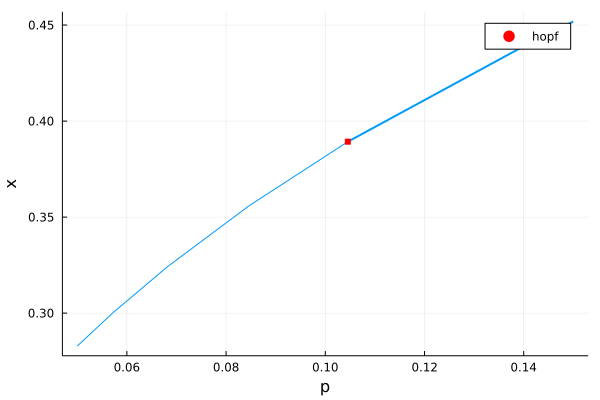

In [20]:
predatorprey(u,p) = predatorprey!(similar(u),u,p,0)
opts = ContinuationPar(pMin=0.05,pMax=0.15, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
br1, = continuation(predatorprey,[0.3,0.3],[1.0,0.25,0.05],(@lens _[3]), opts)
plot(br1)

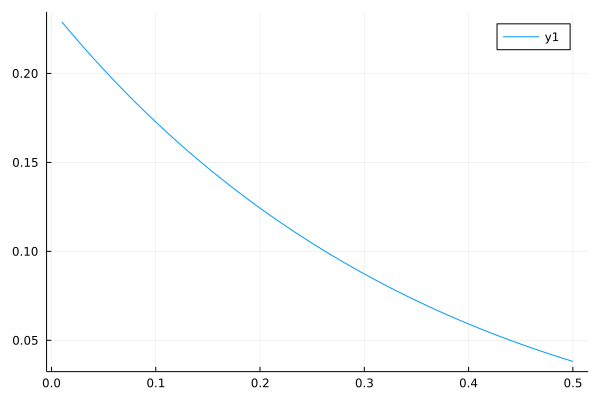

In [21]:
blist = [0.01*n for n in 1:50]
opts = ContinuationPar(pMin=0.15,pMax=0.25, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
br1, = continuation(predatorprey,[0.4,0.4],[1.0,blist[1],0.15],(@lens _[3]), opts)
c = br1.specialpoint[1].param
clist = [c]
for n=2:50
    opts = ContinuationPar(pMin=0.8*c,pMax=1.2*c, ds = 0.01, dsmax = 0.04,detectBifurcation=3,nInversion=8)
    br1, = continuation(predatorprey,[0.4,0.4],[1.0,blist[n],0.8*c],(@lens _[3]), opts)
    c = br1.specialpoint[1].param
    append!(clist,c)
end    
plot(blist,clist)


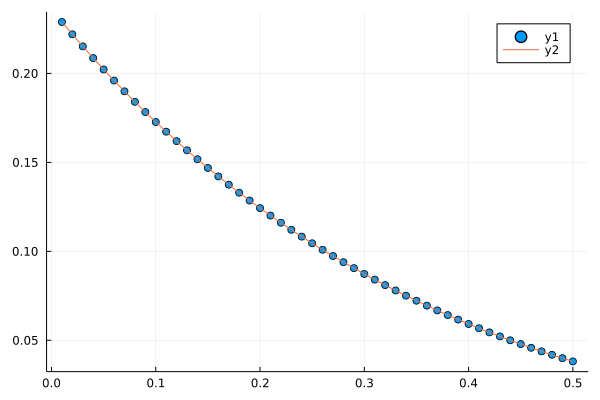

In [22]:
scatter(blist,clist)
bteo = @. 0.5*clist^2+2.5*clist+1-(clist+3)*sqrt(abs2(clist)/4+clist)
plot!(bteo,clist)

# Bifurcaciones de Codimension 2: Cusp

Para tener una bifurcacion de codimension 2 no es necesario que haya dos variables. El modelo de crecimiento logistico con outbreak presenta como habiamos visto dos bifurcaciones de nodo silla. Esto sucede de forma general
si variamos el parametro $P$ para valores fijos de $K$ y $R$.Pero en realidad habiamos tenido que ajustar $K$ para que apareciesen esas bifurcaciones. 

Que sucede para diferentes valores de $K$? No siempre estan esas dos bifurcaciones.

$\dot{x} = Rx(1-x/K)-P\frac{x^2}{1+x^2}$


In [23]:
# Ecuacion Logistica con Outbreak
logoutbreak(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]*x*x/(1+x*x)

logoutbreak (generic function with 1 method)

Probar para valores de $K$ entre 5 y 5.5

In [24]:
F=(x,p) -> @. logoutbreak(x,(p,),0)
opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)

@manipulate throttle=0.1 for K=5.0:0.01:8.0
    br1, = continuation(F,[6.5],[0.5,K,0.6],(@lens _[3]), opts)
    plot(br1)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["K"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 301, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
151, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000078788fb0, Task (runnable) @0x0000000078788fb0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"5.0\",\"5.01\",\"5.02\",\"5.03\",\"5.04\",\"5.05\",\"5.06\",\"5.07\",\"5.08\",\"5.09\",\"5.1\",\"5.11\",\"5.12\",\"5.13\",\"5.14\",\"5.15\",\"5.16\",\"5.17\",\"5.18\",\"5.19\",\"5.2\",\"5.21\",\"5.22\",\"5.23

Como se ve, para valores de $K$ mayores a $5.2$ (aproximadamente) tenemos los dos puntos de bifurcacion y hay una region en la que tenemos tres puntos fijos. Esa region se va haciendo mas estrecha en torno a $P\approx0.77$ a medida que nos aproximamos a ese valor por arriba. Pero para $K=0.52$ y valores menores los dos puntos de bifurcacion desaparecen y tenemos siempre un solo punto fijo para todo valor de $P$.

Es decir que para un valor particular de $K$ cambia el diagrama de bifurcaciones 1D. En el modelo anterior dijimos que a pesar de tener varios parametros en realidad la bifurcacion se cruzaba moviendo uno solo de ellos (codimension 1) y esa bifurcacion en un espacio de parametros 2D correspondia a una curva. 

Como va a ser ahora el diagrama de bifurcaciones en el espacio $(K,P)$? Ciertamente no va a ser una curva sola porque hay dos bifurcaciones de nodo silla, pero ademas a medida que variamos $K$ esas dos curvas se van juntando (notar que los puntos de bifurcacion estan cada vez mas proximos) y cerca de $K=5.2$ deberian juntarse en un mismo punto y desaparecer(o colisionar). Atencion que no estamos hablando de puntos fijos lo que colisionan son dos puntos (o en realidad curvas en 2D) de bifurcacion. 

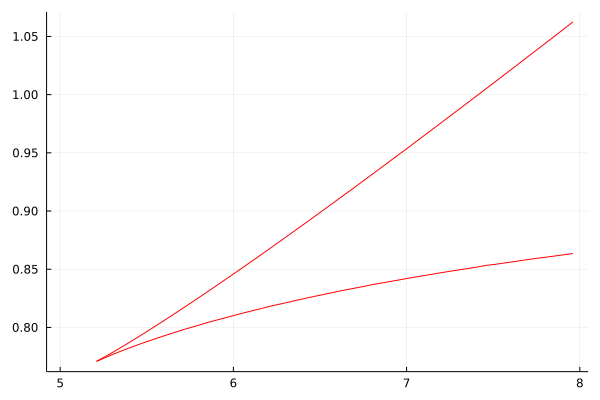

In [25]:
k = [8.01-0.05*n for n in 1:60]
opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)
br1, = continuation(F,[6.5],[0.5,k[1],0.6],(@lens _[3]), opts)
p1 = [br1.specialpoint[1].param]
p2 = [br1.specialpoint[2].param]
x1 = br1.specialpoint[1].x
x2 = br1.specialpoint[2].x
x = [br1.x]
p = [br1.param]
for n=2:60
    opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)
    br1, = continuation(F,[6.5],[0.5,k[n],0.6],(@lens _[3]), opts)
    if length(br1.specialpoint)>0
        append!(p1,br1.specialpoint[1].param)
        append!(p2,br1.specialpoint[2].param)
        append!(x1,br1.specialpoint[1].x)
        append!(x2,br1.specialpoint[2].x)
    else    
        append!(p1,NaN)
        append!(p2,NaN)
        append!(x1,NaN)
        append!(x2,NaN)
    end
    append!(x,[br1.x])
    append!(p,[br1.param])
end
plot(k,p1,color=:red,legend=false)
plot!(k,p2,color=:red)

In [26]:
pl1=plot()
@manipulate throttle=0.05 for az=0:5:90, el=0:5:90
    for n=1:60
        N = length(x[n])
        plot!(pl1,k[n]*ones(N,),p[n],x[n],color=:gray,alpha=0.1,legend=false,camera = (az,el))
    end    
    plot!(pl1,k,p1,x1,color=:red,legend=false)
    plot!(pl1,k,p2,x2,color=:red,legend=false)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["az"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 19, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
10, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007843b080, Task (runnable) @0x000000007843b080), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"5\",\"10\",\"15\",\"20\",\"25\",\"30\",\"35\",\"40\",\"45\",\"50\",\"55\",\"60\",\"65\",\"70\",\"75\",\"80\",\"85\",\"90\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"9702697920595907320\

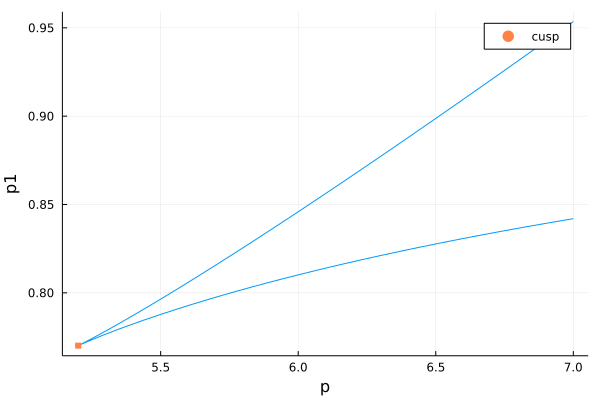

In [27]:
FJ = BifurcationKit.getJet(F; matrixfree=false)
opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)
br1, = continuation(FJ[1],FJ[2],[6.5],[0.5,7.0,0.6],(@lens _[3]), opts; recordFromSolution = (x, p) -> (x = x[1]))
opts2 =  ContinuationPar(opts, pMin=5.0,pMax=7.0, ds = -0.001, dsmax = 0.04)
br2, = continuation(FJ[1:2]..., br1, 1, (@lens _[2]), opts2; detectCodim2Bifurcation=2,updateMinAugEveryStep = 1)
plot(br2)

## Cusp forma Normal

El sistema anterior resulta sumamente arduo de resolver analiticamente, vamos a tomar un ejemplo mas sencillo dependiente de dos parametros (aunque no tiene una aplicacion directa) que tambien experimenta dos bifurcaciones de nodos silla que se juntan en un punto cusp en el espacio de parametros. En realidad el ejemplo es la "formal normal" de esta bifurcacion aunque en el curso no entramos en el detalle de lo que son las formas normales (al menos de manera formal), asi que por ahora podemos tomarla como la forma mas simple o universal.

El sistema es:

$\dot{x} = \mu_1 + \mu_2 x - x^3$ 

Vamos a evitarnos la tarea de calcular los puntos fijos (que implica resolver la cubica como en el caso anterior) e interpretar el miembro derecho (campo vector) geometricamente. Si recordamos la forma de la cubica (sin termino cuadratico) cuando estudiamos los puntos fijos del oscilador de Duffing, podia ser tipo "N" o no dependiendo de is el signo de la parte lineal con respecto a la cubica. En este caso la diferencia es que $\mu_1$ suma como una constante. Si tenemos $\mu_2>0$ la cubica forma una "N" y podemos tener uno o tres puntos fijos dependiendo del valor de $\mu_1$ que sube o baja la curva con un valor constante:

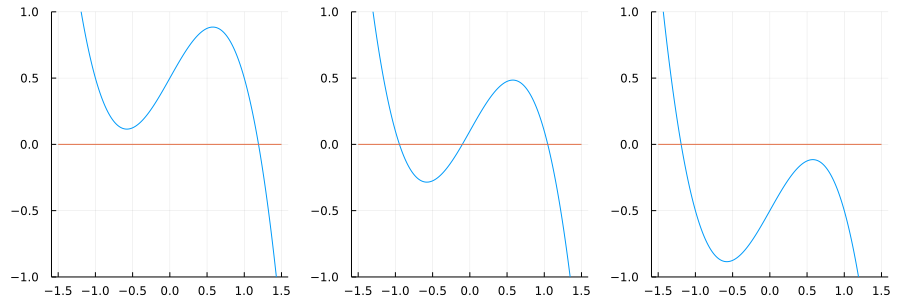

In [28]:
#ejemplo con mu2=1 y diferentes valores de mu1
x = -1.5:0.01:1.5
p1=plot(x,.5 .+x-x.^3,ylims=(-1,1));plot!(p1,[-1.5,1.5],[0,0],legend=false)
p2=plot(x,.1 .+x-x.^3,ylims=(-1,1));plot!(p2,[-1.5,1.5],[0,0],legend=false)
p3=plot(x,-.5 .+x-x.^3,ylims=(-1,1));plot!(p3,[-1.5,1.5],[0,0],legend=false)
plot(p1,p2,p3,layout=(1,3),size=(900,300))

Podemos anticipar que van a ocurrir dos bifurcaciones de nodo silla cuando se pase de 1 a 3 puntos fijos y viceversa. Si en cambio $\mu_2<0$ La cubica esta "estirada" hay siempre un punto fijo (atractor, la pendiente es negativa) y no hay bifurcaciones.

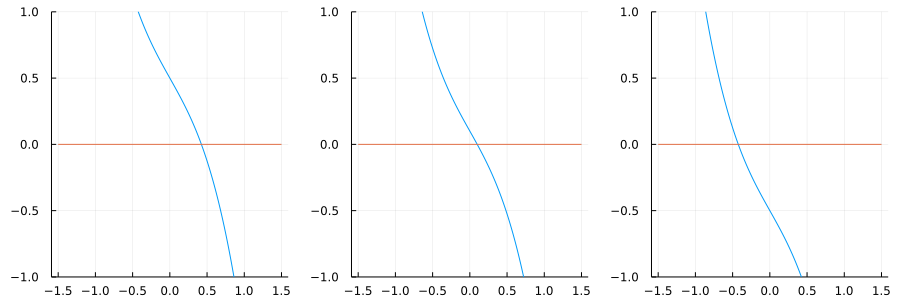

In [29]:
# ahora con mu2=-1
p1=plot(x,.5 .-x-x.^3,ylims=(-1,1));plot!(p1,[-1.5,1.5],[0,0],legend=false)
p2=plot(x,.1 .-x-x.^3,ylims=(-1,1));plot!(p2,[-1.5,1.5],[0,0],legend=false)
p3=plot(x,-.5 .-x-x.^3,ylims=(-1,1));plot!(p3,[-1.5,1.5],[0,0],legend=false)
plot(p1,p2,p3,layout=(1,3),size=(900,300))

Por lo tanto podemos inferir que en algun punto las dos bifurcaciones de nodo silla van a tener que colisionar en un punto cusp. No es dificil ver en este caso que eso ocurre para $\mu_2=0$, $\mu_1=0$

Tampoco es dificil dibujar el diagrama de bifurcaciones. Vamos a dejar fijo $\mu_2$ por ahora y estudiar el diagrama de bifurcaciones en el plano ($\mu_1,x$) como haciamos con la bifurcaciones de codimension 1.

En ese caso recordemos que los puntos fijos corresponden con curvas que estan dadas de forma implicita por $f(x,\mu_1)=0$ donde $f$ es el miembro derecho de la ecuacion (el campo vector). En este caso es mucho mas facil despejar de forma explicita $\mu_1$ en funcion de $x$ (para un valor de  fijo).

$\mu_1(x) = x^3 - \mu_2 x$

que como antes si $\mu_2>0$ es una cubica con forma de "N" que se estira para el otro caso, pero acostada:

In [30]:
x = -1:0.01:1
@manipulate for μ2=-1:0.01:1
    plot()
    if (μ2>0)
        x0 = sqrt(μ2/3)
        scatter!([-2*x0^3],[x0],color=:red)
        scatter!([2*x0^3],[-x0],color=:red)
    end   
    plot!(x.^3-μ2*x,x);plot!([-1,1],[0,0],xrange=(-0.5,0.5),legend=false)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ2"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007c816a40, Task (runnable) @0x000000007c816a40), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.99\",\"-0.98\",\"-0.97\",\"-0.96\",\"-0.95\",\"-0.94\",\"-0.93\",\"-0.92\",\"-0.91\",\"-0.9\",\"-0.89\",\"-0.88\",\"-0.87\",\"-0.86\",\"-0.85\",\"-0.84\",\"-0.83\",\"-0.82\",\"-0.81\",\"-0.8\",\"

Ademas podemos calcular para que valores de ($\mu_1,x$) ocurren las bifurcaciones de nodo silla (en el caso de $\mu_2>0$). Solo tenemos que encontrar cuando la derivada de $\mu_1$ con respecto a $x$ se hace cero y eso sucede cuando $3x^2 = \mu_2$ o sea para los puntos: 

$x=-\sqrt{\mu_2/3}$ ,  $\mu_1=2\left( \sqrt{\mu_2/3}\right)^3$

$x=\sqrt{\mu_2/3}$ ,  $\mu_1=-2\left( \sqrt{\mu_2/3} \right)^3$

esos puntos estan representados en el grafico interactivo de arriba

Vamos ahora a trazar el diagrama de bifurcaciones completo en el espacio de parametros ($\mu_1,\mu_2$). Las curvas que determinan la bifurcacion de nodo silla en este espacio corresponden a los dos puntos calculados anteriormente pero ahora expresados como $\mu_1$ en funcion de $\mu_2$ en el dominio $\mu_2>0$ 

$\mu_1= \pm 2\left( \sqrt{\mu_2/3}\right)^3$

In [31]:
μ2list = 0:0.01:1
@manipulate throttle=.1 for μ2=-0.5:0.01:1
    p1 = plot(x.^3-μ2*x,x);plot!([-1,1],[0,0],xlims=(-0.5,0.5),legend=false)
    p2 = plot(-2*sqrt.(μ2list/3).^3,μ2list,xlims=(-0.5,0.5),legend=false,color=:red)
    p2 = plot!(2*sqrt.(μ2list/3).^3,μ2list,ylims=(-0.5,1),color=:red)
    if (μ2>0)
        x0 = sqrt(μ2/3)
        scatter!(p1,[-2*x0^3],[x0],color=:red)
        scatter!(p1,[2*x0^3],[-x0],color=:red)
        scatter!(p2,[-2*x0^3],[μ2],color=:red)
        scatter!(p2,[2*x0^3],[μ2],color=:red)
    else
        scatter!(p2,[0],[μ2],color=:gray)
    end   
    plot(p1,p2,layout=(2,1),size=(400,500))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ2"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 151, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
76, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000e8fa0e0, Task (runnable) @0x000000000e8fa0e0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-0.5\",\"-0.49\",\"-0.48\",\"-0.47\",\"-0.46\",\"-0.45\",\"-0.44\",\"-0.43\",\"-0.42\",\"-0.41\",\"-0.4\",\"-0.39\",\"-0.38\",\"-0.37\",\"-0.36\",\"-0.35\",\"-0.34\",\"-0.33\",\"-0.32\",\"-0.31\",\"-0.3\",\"-

# Bifurcacion Takens-Bogdanov (codimension 2)

Las bifurcaciones (de codimension 1) que vimos hasta ahora se pueden caracterizar en dos grupos:

- Las que suceden cuando un autovalor real se hace cero. Tenemos de forma generica una bifurcacion de nodo silla, pero tambien una pitchfork o una transcritica si se dan otras condiciones de simetria.
- La que sucede cuando la parte real de dos autovalores complejos conjugados se hace cero. En ese caso tenemos una bifurcacion de Hopf.

Claramente el primer caso puede suceder en un sistema 1D (o uno de mayor dimension a lo largo de una direccion particular), mientras que el segundo necesitamos al menos un sistema 2D para tener dos autovalores, pero hace falta solo un parametro para controlarla (para mover la parte real). 

Pero si estamos en un sistema 2D, no podria suceder que **ambos** autovalores se hagan cero de forma simultanea? Claramente si vemos la expresion de los autovalores vamos a necesitar al menos dos parametros para ajustar este punto. Por otra parte que dos autovalores crucen el cero por el eje real seria algo asi como dos nodo-silla sucediendo al mismo tiempo, pero tambien podria verse como una bifurcacion de Hopf con parte imaginaria cero. Es decir este tipo de bifurcacion "degenerada" tiene adentro al menos dos nodo silla (como la cusp) y una Hopf. 

Esta bifurcacion de codimension 2 se conoce como doble cero o Bogdanov-Takens (o Takens-Bogdanov). La forma normal  esta caracterizada por tener el siguiente Jacobiano:

$
\begin{pmatrix}
0 & 1\\
0 & 0
\end{pmatrix}
$

el cual "induce" que aparezcan los siguientes terminos no lineales (en la version de Bogdanov):

$\dot{x} = y$

$\dot{y} = x^2-xy$

Notar que todavia no introdujimos ningun parametro, esto es la singularidad "pura". Para extender esto en el espacio de parametros (o de sistemas dinamicos para ser mas preciso) es necesario hacer un **unfolding**, y aca hay varias posibilidades, vamos tomar la que hace Guckenheimer & Holmes:

$\dot{x} = y$

$\dot{y} = \mu_1+\mu_2x+ x^2 -xy$

Vamos a estudiar directamente las bifurcaciones sin preocuparnos todavia por las soluciones porque este sistema (al igual del nodo silla en el plano) tiene trayectorias divergentes.

Como tenemos terminos hasta orden cuadratico vamos a poder tener de forma generica dos puntos fijos o ninguno. Siempre ubicados en el eje horizontal $y=0$ y con la coordenada $x$ en:

$x_{\pm}=-\frac{\mu_2}{2}\pm \sqrt{\frac{\mu_2^2}{4}-\mu_1}$

El signo positivo corresponde al punto fijo de la derecha y el negativo al de la izquierda (cuando estos existan).

la condicion para existencia de los puntos fijos es que el interior de la raiz sea positivo lo cual nos da una condicion para trazar una curva de bifurcacion nodos silla en el plano $(\mu_1,\mu_2)$:

SN : $\mu_1=\frac{\mu_2^2}{4}$

Por otra parte el Jacobiano evaluado en los puntos fijos (conservando el orden $\pm$) queda escrito 

$
\begin{pmatrix}
0 & 1\\
\pm 2\sqrt{\frac{\mu_2^2}{4}-\mu_1} & \frac{\mu_2}{2}\mp \sqrt{\frac{\mu_2^2}{4}-\mu_1}
\end{pmatrix}
$

Lo cual nos da el determinante:

$\Delta = \mp 2\sqrt{\frac{\mu_2^2}{4}-\mu_1}$

que para el punto fijo de la derecha es siempre negativo (punto silla) y para el de la izquierda positivo. Para este ultimo evaluamos la traza (solo conservamos el signo de abajo):

$\tau = \frac{\mu_2}{2}+\sqrt{\frac{\mu_2^2}{4}-\mu_1} $

como la raiz es positiva cuando $\mu_2<0$, la traza se va a hacer cero cuando $\mu_1=0$. Esto nos da la condicion para trazar la curva de la bifurcacion de Hopf  en el plano $(\mu_1,\mu_2)$:

Hopf: $\mu_2>0$  , $\mu_1=0$

Esta curva se junta con la parabola SN en el punto $(0,0)$ asi que tal como habiamos anticipado en este punto singular tenemos una curva SN y una Hopf ocurriendo simultaneamente. El diagrama de bifurcaciones completo (tomado de la Scholarpedia) es:

<div>
<img src="../files/BogdanovTakens.gif" width="500px">
</div>


Notar que hay una curva adicional (en rojo) que corresponde a una bifurcacion global (conexion homoclinica). No vamnos a estudiar bifurcaciones globales pero podemos decir que las mas comunes ocurren cuando las variedades estables e inestables de diferentes puntos silla se conectan entre si (conexion heteroclinica) o en el mismo punto silla como en este caso (conexion homoclinica). Explorar las como se modifican las variedades en el grafico de abajo y tratar de localizar cuando se produce la conexion homoclinica. Como guia se muestra a la derecha el diagrama de bifurcaciones con las curvas SN y Hopf analiticas y en linea punteada la homclinica que ocurre (no vamos a mostrar la deduccion de eso) cuando:

HC: $\mu_1 = -\frac{6}{25}\mu_2^2$ ,  $\mu_2<0$


In [32]:
function takens!(du,u,p,t)
    du[1]=u[2]
    du[2]=p[1]+p[2]*u[1]+u[1]*u[1]-u[1]*u[2]
    du
end    

takens! (generic function with 1 method)

In [33]:
function takens_jac(u,p) 
  J = Array{Float64, 2}(undef, 2, 2)
  J[1,1] = 0
  J[1,2] = 1.0
  J[2,1] = p[2]+2*u[1]-u[2]
  J[2,2] = -u[1]
  return J
end

takens_jac (generic function with 1 method)

In [34]:
@manipulate throttle=0.5 for μ1=-1:0.005:1,μ2=-1:0.005:1
    if μ1 < μ2^2/4
        u0_array=[[-μ2/2-sqrt(μ2^2/4-μ1);0],[-μ2/2+sqrt(μ2^2/4-μ1);0]]
        p1=plot_manifolds(takens!,takens_jac,u0_array,[μ1,μ2];tmax=100,delta=1e-6,xlims=[-1.5,1.5],ylims=[-1,1],size=(400,400))
    else 
        p1=plot()
    end 
    p2 = plot(0.25*(-1:0.01:1).^2,-1:0.01:1,color=:blue,legend=false)
    plot!(p2,-6/25*(-1:0.01:0).^2,-1:0.01:0,color=:red,legend=false)
    plot!(p2,[0,0],[-1,0.0],color=:green)
    scatter!(p2,[μ1],[μ2],xlims=(-0.5,0.5))
    plot(p1,p2,layout=(1,2),size=(900,400))
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 401, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
201, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000791d9aa0, Task (runnable) @0x00000000791d9aa0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.995\",\"-0.99\",\"-0.985\",\"-0.98\",\"-0.975\",\"-0.97\",\"-0.965\",\"-0.96\",\"-0.955\",\"-0.95\",\"-0.945\",\"-0.94\",\"-0.935\",\"-0.93\",\"-0.925\",\"-0.92\",\"-0.915\",\"-0.91\",\"-0.905\",

Si bien en este caso pudimos calcular las curvas de bifurcacion de forma analitica (al menos SN y Hopf) Vamos a usar BifurcationToolkit para seguir las curvas de bifurcacion. Empezamos con la mas facil que es la SN



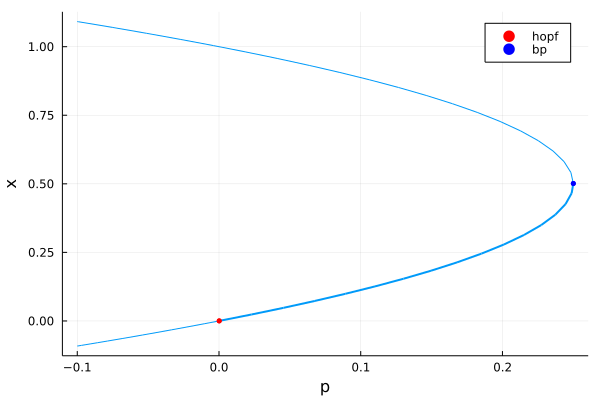

In [37]:
takens(u,p) = takens!(similar(u),u,p,0)
opts = ContinuationPar(pMin=-0.1, pMax=0.28, ds = 0.001, dsmax = 0.02,detectBifurcation = 3)
FJ = BifurcationKit.getJet(takens,(z,p) -> ForwardDiff.jacobian(x -> takens(x,p), z))
br1, = continuation(FJ[1],FJ[2],[-0.9;0],[-0.1,-1.0],(@lens _[1]),opts,recordFromSolution = (x, p) -> x[1])
plot(br1)

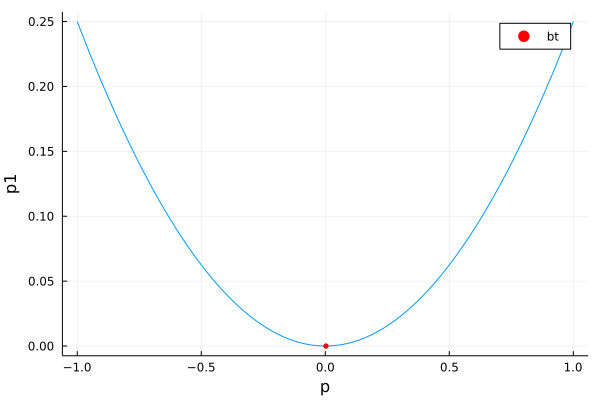

In [38]:
SN, = continuation(FJ[1],FJ[2],br1,2,(@lens _[2]), ContinuationPar(opts, pMin=-1.0,pMax=1.0); 
    detectCodim2Bifurcation=2,updateMinAugEveryStep = 1,bdlinsolver = MatrixBLS())
plot(SN)

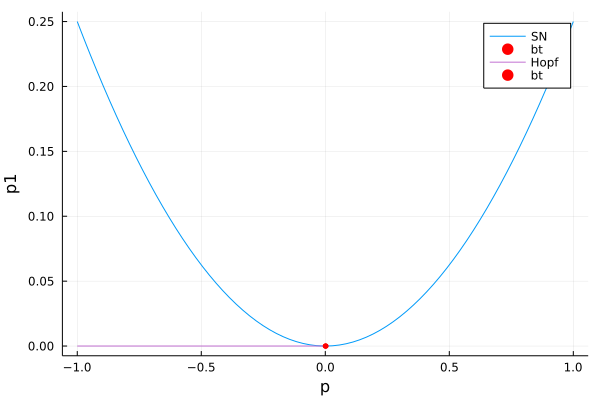

In [39]:
H, = continuation(FJ[1],FJ[2],br1,1,(@lens _[2]), ContinuationPar(opts, pMin=-1.0,pMax=0.1);
    detectCodim2Bifurcation=2,startWithEigen=true,d2F=FJ[3],d3F =FJ[4],updateMinAugEveryStep = 1,
    bdlinsolver = MatrixBLS())
plot(SN,branchlabel="SN")
plot!(H,branchlabel="Hopf")

## Bogdanov Takens con terminos cubicos

Como puede verse la bifurcacion BT presenta una dinamica muy interesante y variada, con minimas alteraciones en los parametros se puede pasar de comportamientos oscilatorios, creacion de pares de puntos fijos y orbitas de periodo infinito (conexiones HC). El problma del sistema anterior es que tiene trayectorias divergentes, por lo cual necesitamos agregar terminos de orden mas alto (que no van a alterar la bifurcacion de BT aunque si pueden cambiar el diagrama de bifurcaciones fuera de ese punto) que aseguren que las trayectorias no diverjan. De vuelta hay varias alternativas, vamos a seguir la que propone Mindlin:

$\dot{x} = y$

$\dot{y} = \mu_1+\mu_2x+ x^2 -xy - x^3 -x^2y$ 

En este caso al tener terminos cubicos vamos a tener de forma general uno o tres puntos fijos, como en el caso de la cusp los puntos fijos pasan de ser 1 a 3 a traves de bifurcaciones de nodo silla que ocurren en pares de puntos distintos. De hecho los terminos cubicos lo que hacen es introducir una cusp ademas de la Bogadanov-Takens.

Vamos a ver como se organizan las variedades a partir 

In [40]:
function takens3!(du,u,p,t)
    du[1]=u[2]
    du[2]=p[1]+u[1]*(p[2]-u[2]+u[1]*(1-u[1]-u[2]))
    du
end    

takens3! (generic function with 1 method)

In [43]:
@manipulate throttle=0.1 for μ1=-0.15:0.001:0.1,μ2=-0.4:0.001:0.1
    phase_portrait(takens3!,[μ1,μ2];tmax=300,xlims=[-1,1],ylims=[-0.5,0.5])
end    

LoadError: UndefVarError: phase_portrait not defined

In [ ]:
takens3(u,p) = takens3!(similar(u),u,p,0)
opts = ContinuationPar(pMin=-0.1, pMax=0.2, ds = 0.001, dsmax = 0.02,detectBifurcation = 3)
FJ = BifurcationKit.getJet(takens3,(z,p) -> ForwardDiff.jacobian(x -> takens3(x,p), z))
br1, = continuation(FJ[1],FJ[2],[-0.9;0],[-0.1,-0.1],(@lens _[1]),opts,recordFromSolution = (x, p) -> x[1])
print([pt.type for pt in br1.specialpoint])
plot(br1)

In [ ]:
SN, = continuation(FJ[1],FJ[2],br1,3,(@lens _[2]), ContinuationPar(opts, pMin=-0.4,pMax=0.3,ds=-0.001); 
    detectCodim2Bifurcation=2,updateMinAugEveryStep = 1,bdlinsolver = MatrixBLS())
plot(SN)

In [ ]:
br2, = continuation(FJ[1],FJ[2],[-0.9;0],[-0.1,-0.4],(@lens _[1]),opts,recordFromSolution = (x, p) -> x[1])
H, = continuation(FJ[1],FJ[2],br2,1,(@lens _[2]), ContinuationPar(opts, pMin=-0.4,pMax=0.1);
    detectCodim2Bifurcation=2,startWithEigen=true,d2F=FJ[3],d3F =FJ[4],updateMinAugEveryStep = 1,
    bdlinsolver = MatrixBLS())
p1=plot(H,branchlabel="Hopf",plotspecialpoints=false)
plot!(p1,SN,branchlabel="SN",ylims=(-0.1,0.07),xaxis=("μ2"),yaxis=("μ1"))

In [ ]:
@manipulate throttle=0.1 for μ1=-0.15:0.001:0.1,μ2=-0.4:0.001:0.1
    p2=phase_portrait(takens3!,[μ1,μ2];tmax=300,xlims=[-0.7,0.7],ylims=[-0.5,0.5])
    p1=plot(H,branchlabel="Hopf",plotspecialpoints=false)
    plot!(p1,SN,branchlabel="SN",ylims=(-0.1,0.07),xaxis=("μ2"),yaxis=("μ1"))
    scatter!(p1,[μ2],[μ1],label=false)
    plot(p1,p2,layout=(1,2),size=(900,400))
end  